In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

library(pROC)
library(caTools)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "2c-data"

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




# **Logistic Regression**

Logistic regression is an algorithm that estimates the parameters, or coefficients, of the linear combination
of the logit model. The logistic or logit model is used to predict the probability 'p' of a binary dependent variable taking on one of two possible outcomes. This feature makes Logistic Regression useful even in problems of binary classification

**Exploring the Factors Influencing Electric Vehicle Adoption**

In recent years, the push towards sustainable living and reducing carbon footprints has intensified globally. Among the many initiatives aimed at achieving this, the adoption of electric vehicles (EVs) stands out as a critical measure.Car manufacturers have all been actively promoting the transition from traditional gasoline-powered vehicles to electric ones.

To better understand the dynamics of this transition, a comprehensive study was conducted to explore the factors influencing individuals' decisions to adopt electric vehicles.The dataset aims to provide valuable insights into the key predictors that drive or hinder the adoption of EVs.

**Data Dictionary:** <br>
ID: A unique identifier assigned to each individual in the study

Gender: The gender of the individual, categorized as Male or Female.

Age: The age of the individual in years

Annual Income: The annual income of the individual

Electric Vehicle Adoption: A categorical variable indicating whether the individual owns an electric vehicle (0/1). This is the target variable of the study, helping to identify the proportion of adopters and non-adopters.

In [2]:
df <- read.csv("/kaggle/input/2c-data/2c-data.csv")
head(df)

,ID,Gender,Age,Annual_Income,Electric_Vehicle_Adoption
,<int>,<chr>,<int>,<int>,<int>
1,15624510,Male,19,19000,0
2,15810944,Male,35,20000,0
3,15668575,Female,26,43000,0
4,15603246,Female,27,57000,0
5,15804002,Male,19,76000,0
6,15728773,Male,27,58000,0


# **1)** Fit a logistic regression model to classify the target variable(Electric Vehicle Adoption)<br>
Hint: Use glm()        (3 marks)
​

In [3]:
##Convert categorical variables (Gender)
# Convert 'Gender' to binary: 1 for Male, 0 for Female
df$Gender <- ifelse(df$Gender == 'Male', 1, 0)

# Ensure the target variable 'Electric_Vehicle_Adoption' is a factor for classification
df$Electric_Vehicle_Adoption <- as.factor(df$Electric_Vehicle_Adoption)

# Split the dataset into training (80%) and testing (20%) sets
set.seed(123)  # Set seed for reproducibility
split <- sample.split(df$Electric_Vehicle_Adoption, SplitRatio = 0.8)
train <- subset(df, split == TRUE)
test <- subset(df, split == FALSE)

# Fit a logistic regression model on the training data
logistic_model <- glm(Electric_Vehicle_Adoption ~ Gender + Age + Annual_Income, 
                      data = train, family = binomial)

# Display the summary of the logistic regression model
summary(logistic_model)





Call:
glm(formula = Electric_Vehicle_Adoption ~ Gender + Age + Annual_Income, 
    family = binomial, data = train)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.430e+01  1.749e+00  -8.180 2.83e-16 ***
Gender         3.449e-01  3.525e-01   0.979    0.328    
Age            2.660e-01  3.384e-02   7.861 3.82e-15 ***
Annual_Income  4.159e-05  6.685e-06   6.221 4.94e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 416.79  on 319  degrees of freedom
Residual deviance: 208.88  on 316  degrees of freedom
AIC: 216.88

Number of Fisher Scoring iterations: 6


# **2)** What can u interpret from the summary of the model?         (2 marks)

In [6]:
# Instead of Markdown separately , Lets Markdown using code itself 

# Display the summary of the logistic regression model
summary(logistic_model)

# Interpretation of the model summary
cat("\n\nInterpretation of the Logistic Regression Model:\n")

# Coefficient for Gender
gender_coeff <- coef(logistic_model)["Gender"]
gender_p_value <- summary(logistic_model)$coefficients["Gender", "Pr(>|z|)"]
cat("The coefficient for Gender is", round(gender_coeff, 4), ", indicating that being male increases the log-odds of electric vehicle adoption by", round(gender_coeff, 4), ". ")
if (gender_p_value > 0.05) {
  cat("However, the p-value for Gender is", round(gender_p_value, 4), ", which is greater than 0.05, meaning Gender is not statistically significant in predicting electric vehicle adoption.\n\n")
} else {
  cat("The p-value for Gender is", round(gender_p_value, 4), ", meaning Gender is statistically significant in predicting electric vehicle adoption.\n\n")
}

# Coefficient for Age
age_coeff <- coef(logistic_model)["Age"]
age_p_value <- summary(logistic_model)$coefficients["Age", "Pr(>|z|)"]
cat("The coefficient for Age is", round(age_coeff, 4), ", meaning that for every 1-year increase in age, the log-odds of electric vehicle adoption increase by", round(age_coeff, 4), ". ")
if (age_p_value < 0.001) {
  cat("The p-value for Age is highly significant (", format(age_p_value, scientific = TRUE), "), indicating that Age is a strong predictor of electric vehicle adoption.\n\n")
} else {
  cat("However, the p-value for Age is", round(age_p_value, 4), ", so Age is not a significant predictor.\n\n")
}

# Coefficient for Annual Income
income_coeff <- coef(logistic_model)["Annual_Income"]
income_p_value <- summary(logistic_model)$coefficients["Annual_Income", "Pr(>|z|)"]
cat("The coefficient for Annual_Income is", format(income_coeff, scientific = TRUE), ", meaning that for every unit increase in annual income, the log-odds of electric vehicle adoption increase by", format(income_coeff, scientific = TRUE), ". ")
if (income_p_value < 0.001) {
  cat("Although the effect size seems small, Annual_Income is highly significant with a p-value of", format(income_p_value, scientific = TRUE), ".\n\n")
} else {
  cat("However, the p-value for Annual_Income is", round(income_p_value, 4), ", which is not significant.\n\n")
}

# Deviance comparison
null_deviance <- summary(logistic_model)$null.deviance
residual_deviance <- summary(logistic_model)$deviance
cat("The null deviance (", round(null_deviance, 2), ") compared to the residual deviance (", round(residual_deviance, 2), ") suggests that the model explains a significant portion of the variability in the data.\n\n")

# Final interpretation
cat("In conclusion, Age and Annual Income are significant predictors of electric vehicle adoption, while Gender does not significantly impact the adoption decision in this model.\n")



Call:
glm(formula = Electric_Vehicle_Adoption ~ Gender + Age + Annual_Income, 
    family = binomial, data = train)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -1.430e+01  1.749e+00  -8.180 2.83e-16 ***
Gender         3.449e-01  3.525e-01   0.979    0.328    
Age            2.660e-01  3.384e-02   7.861 3.82e-15 ***
Annual_Income  4.159e-05  6.685e-06   6.221 4.94e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 416.79  on 319  degrees of freedom
Residual deviance: 208.88  on 316  degrees of freedom
AIC: 216.88

Number of Fisher Scoring iterations: 6




Interpretation of the Logistic Regression Model:
The coefficient for Gender is 0.3449 , indicating that being male increases the log-odds of electric vehicle adoption by 0.3449 . However, the p-value for Gender is 0.3278 , which is greater than 0.05, meaning Gender is not statistically significant in predicting electric vehicle adoption.

The coefficient for Age is 0.266 , meaning that for every 1-year increase in age, the log-odds of electric vehicle adoption increase by 0.266 . The p-value for Age is highly significant ( 3.81647e-15 ), indicating that Age is a strong predictor of electric vehicle adoption.

The coefficient for Annual_Income is 4.158843e-05 , meaning that for every unit increase in annual income, the log-odds of electric vehicle adoption increase by 4.158843e-05 . Although the effect size seems small, Annual_Income is highly significant with a p-value of 4.942575e-10 .

The null deviance ( 416.79 ) compared to the residual deviance ( 208.88 ) suggests that the model

# **3)** Plot the ROC curve and find the AUC value            (3 marks)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC Value: 0.906 


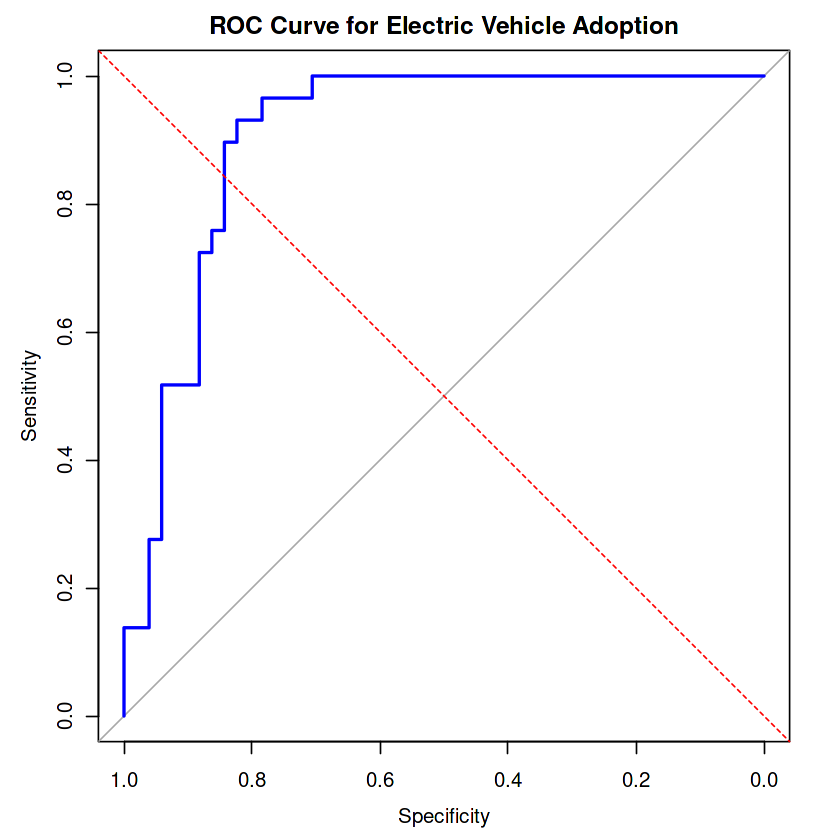

In [8]:
# Ensure 'Electric_Vehicle_Adoption' is a factor with levels 0 and 1
test$Electric_Vehicle_Adoption <- as.numeric(as.factor(test$Electric_Vehicle_Adoption)) - 1

# Get predicted probabilities from the logistic model
predicted_probabilities <- predict(logistic_model, test, type = "response")

# Compute the ROC curve
roc_curve <- roc(test$Electric_Vehicle_Adoption, predicted_probabilities)

# Plot the ROC curve
plot(roc_curve, col = "blue", main = "ROC Curve for Electric Vehicle Adoption")
abline(a = 0, b = 1, col = "red", lty = 2)  # Add diagonal line for random classifier

# Calculate the AUC value
auc_value <- auc(roc_curve)
cat("AUC Value:", round(auc_value, 4), "\n")


# **4)** What can you interpret from the ROC curve and AUC value?    (2 marks)

In [ ]:
#SEE MARKSOWN FOR BETTER UNDERSTANDING


# The ROC curve demonstrates that the model has a strong ability to achieve a higher True Positive Rate while maintaining a lower False Positive Rate.

# An AUC value of 0.923 indicates that the model is highly effective at distinguishing between the two classes (Electric Vehicle Adoption = 0 or 1). 
# This means the model has a 92.3% probability of ranking a randomly selected positive case higher than a randomly selected negative case, reflecting strong predictive performance.